### **Prophet Model**

- **Prophet**: Facebook(현 Meta)에서 개발한 **오픈 소스 시계열 예측 라이브러리**
  - 시계열 데이터를 **추세 (trend)**, **계절성 (seasonality)**, **휴일 효과 (holidays)** 등 주요 구성 요소로 분해하여 예측 수행

- **주요 특징**:
  - **추세 (Trend)**: 데이터의 장기적인 **증가나 감소 경향**을 모델링
  - **계절성 (Seasonality)**: 일별, 주별, 연별 등 **주기적인 변동 패턴**을 포착
  - **휴일 효과 (Holidays)**: 공휴일이나 **특별 이벤트가 데이터에 미치는 영향** 반영
  - **결측치와 이상치에 강건**하며, 데이터의 불규칙한 변동에도 유연하게 대응
  - **Python과 R에서 모두 사용 가능**하며, **사용자 친화적인 인터페이스** 제공

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# 데이터 불러오기
df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/한국전력거래소_시간별 신재생에너지 거래량_20220331.csv',encoding='cp949')

### 모델 입력을 위한 데이터 형식 변환

In [2]:
# '24:00:00'을 '00:00:00'으로 변환
df['거래시간'] = df['거래시간'].astype(str).str.zfill(2) + ':00:00'
df['거래시간'] = df['거래시간'].replace('24:00:00', '00:00:00')

# 거래일과 거래시간을 결합하여 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['거래일'] + ' ' + df['거래시간'], format='%Y-%m-%d %H:%M:%S')

# '24:00:00'을 '00:00:00'으로 변환 후, 해당 날짜를 다음 날로 수정
df.loc[df['거래시간'] == '00:00:00', 'datetime'] += pd.Timedelta(days=1)

# 필요한 열 선택 및 열 이름 변경
df = df[['datetime', '신재생 합계']]
df = df.rename(columns={'datetime': 'ds', '신재생 합계': 'y'})

# 일별 데이터로 변환
df_daily = df.resample('D', on='ds').sum().reset_index()

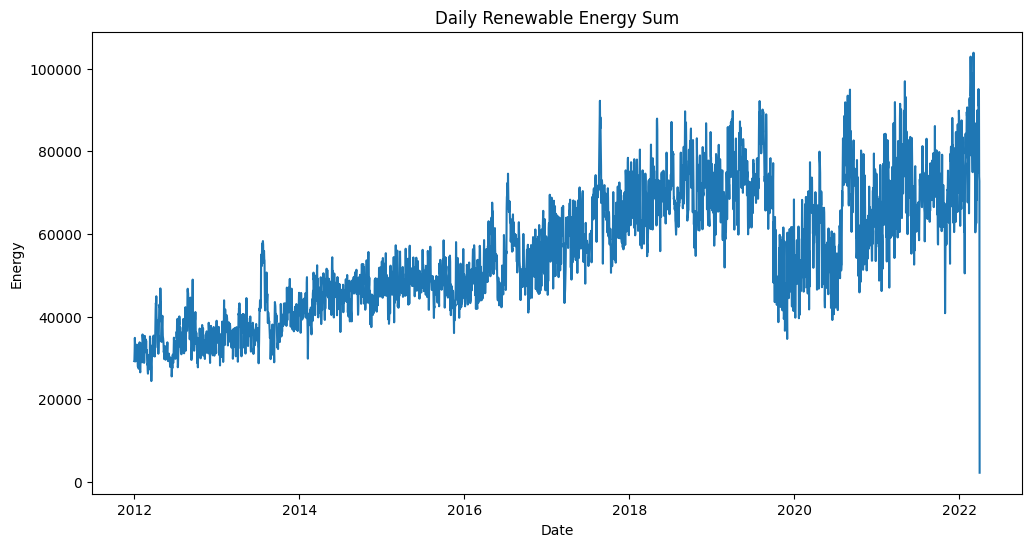

In [3]:
import matplotlib.pyplot as plt

# 2. 데이터 탐색 및 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_daily['ds'], df_daily['y'])
plt.title('Daily Renewable Energy Sum')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.show()

In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\82106\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### **모델링**

In [5]:
from prophet import Prophet

# 3. 모델링
model = Prophet()
model.fit(df_daily)

Importing plotly failed. Interactive plots will not work.
01:44:44 - cmdstanpy - INFO - Chain [1] start processing
01:44:45 - cmdstanpy - INFO - Chain [1] done processing


### **예측수행**

In [ ]:
future = model.make_future_dataframe(periods=365*3)
forecast = model.predict(future)

### **시각화**

c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1200x600 with 0 Axes>

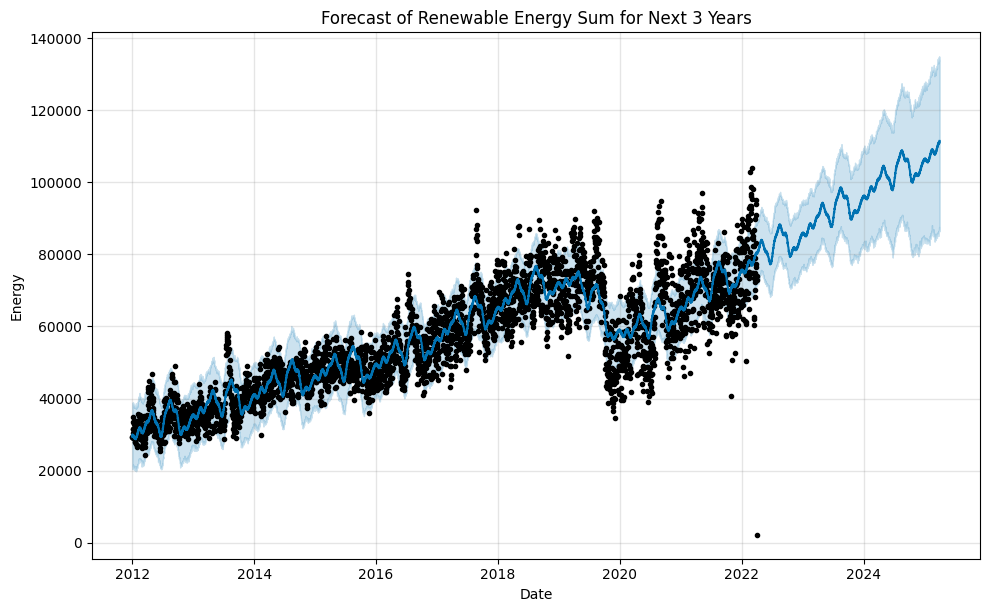

In [ ]:
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title('Forecast of Renewable Energy Sum for Next 3 Years')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.show()

### **각 에너지 예측 수행**

In [17]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/한국전력거래소_시간별 신재생에너지 거래량_20220331.csv',encoding='cp949')

# '24:00:00'을 '00:00:00'으로 변환
df['거래시간'] = df['거래시간'].astype(str).str.zfill(2) + ':00:00'
df['거래시간'] = df['거래시간'].replace('24:00:00', '00:00:00')

# 거래일과 거래시간을 결합하여 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['거래일'] + ' ' + df['거래시간'], format='%Y-%m-%d %H:%M:%S')

# '24:00:00'을 '00:00:00'으로 변환 후, 해당 날짜를 다음 날로 수정
df.loc[df['거래시간'] == '00:00:00', 'datetime'] += pd.Timedelta(days=1)

In [18]:
# 필요한 열 선택 및 열 이름 변경
energy_columns = ['연료전지', '석탄가스화복합화력(IGCC)', '태양광', '풍력', '수력', '해양에너지', '바이오에너지', '폐기물에너지']
df = df[['datetime'] + energy_columns]

# 일별 데이터로 변환
df_daily = df.resample('D', on='datetime').sum().reset_index()

# 결과 저장을 위한 빈 데이터프레임 생성
results = pd.DataFrame()

In [19]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:37 - cmdstanpy - INFO - Chain [1] start processing
19:25:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

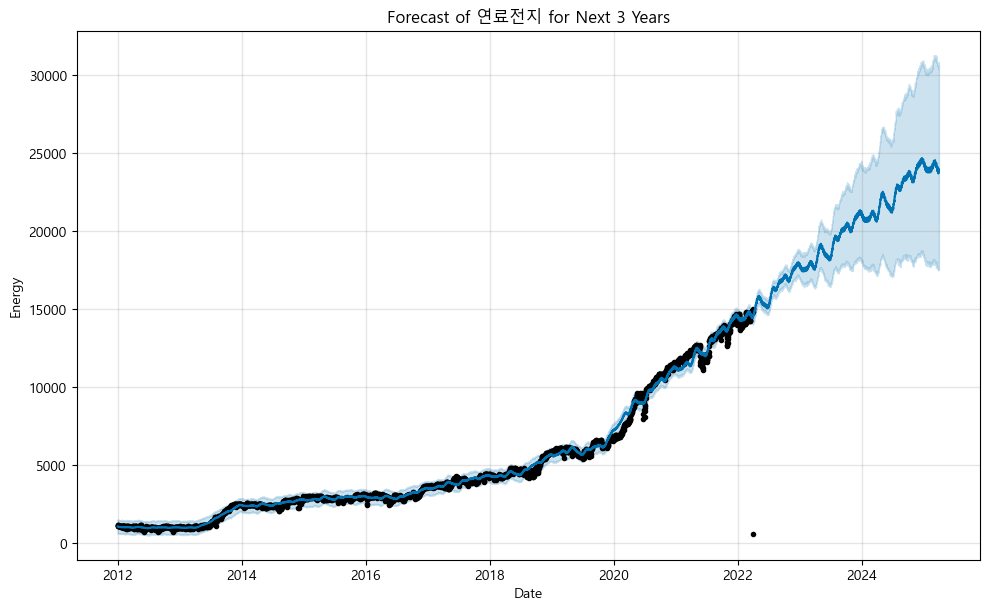

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:41 - cmdstanpy - INFO - Chain [1] start processing
19:25:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

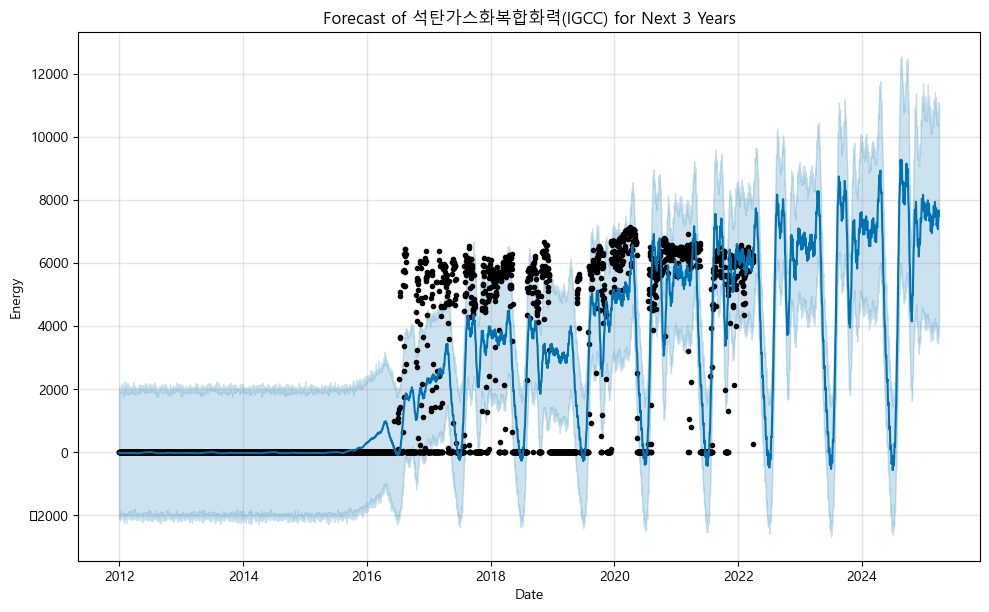

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:44 - cmdstanpy - INFO - Chain [1] start processing
19:25:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

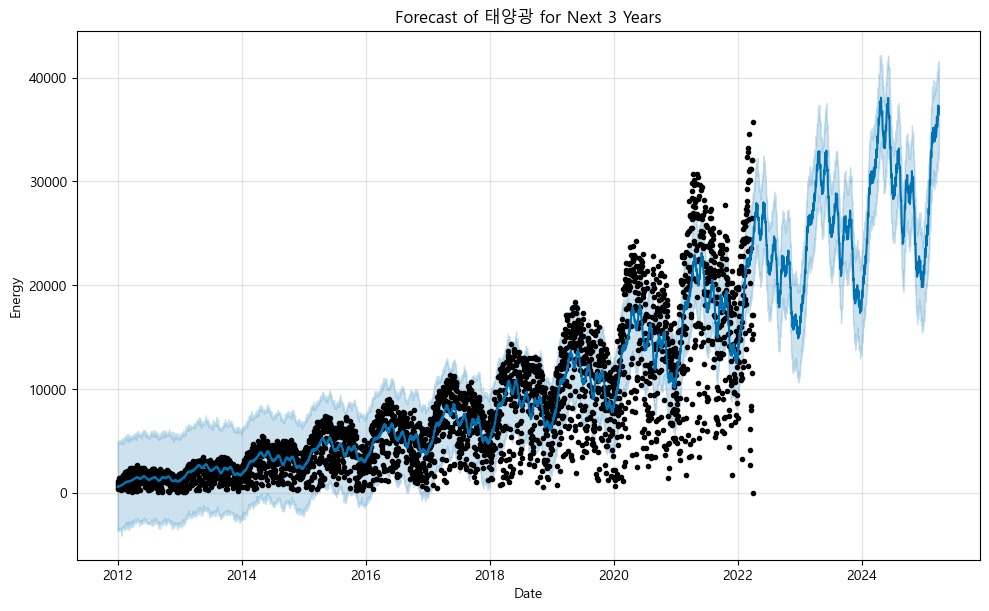

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:47 - cmdstanpy - INFO - Chain [1] start processing
19:25:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

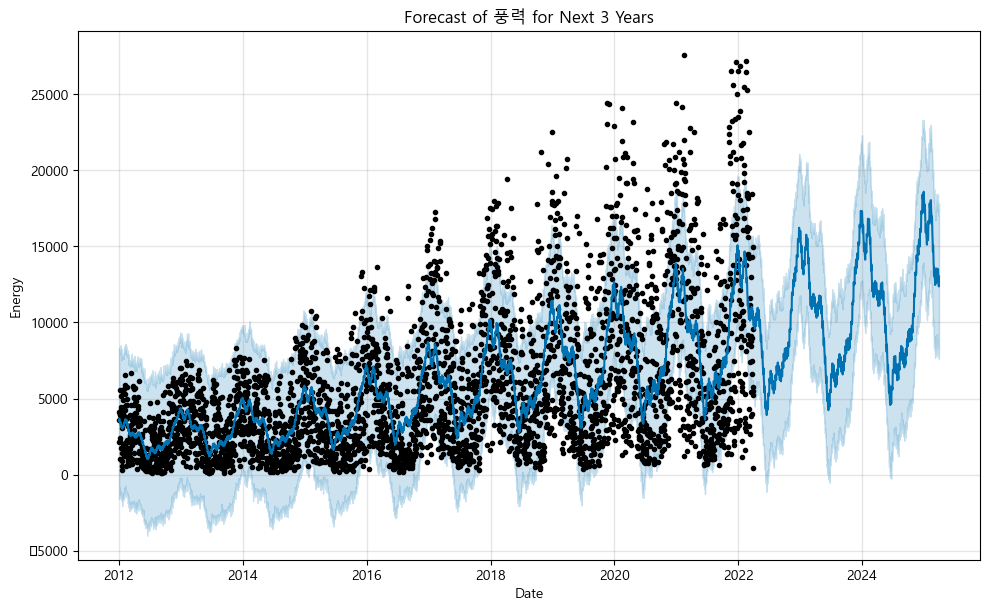

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

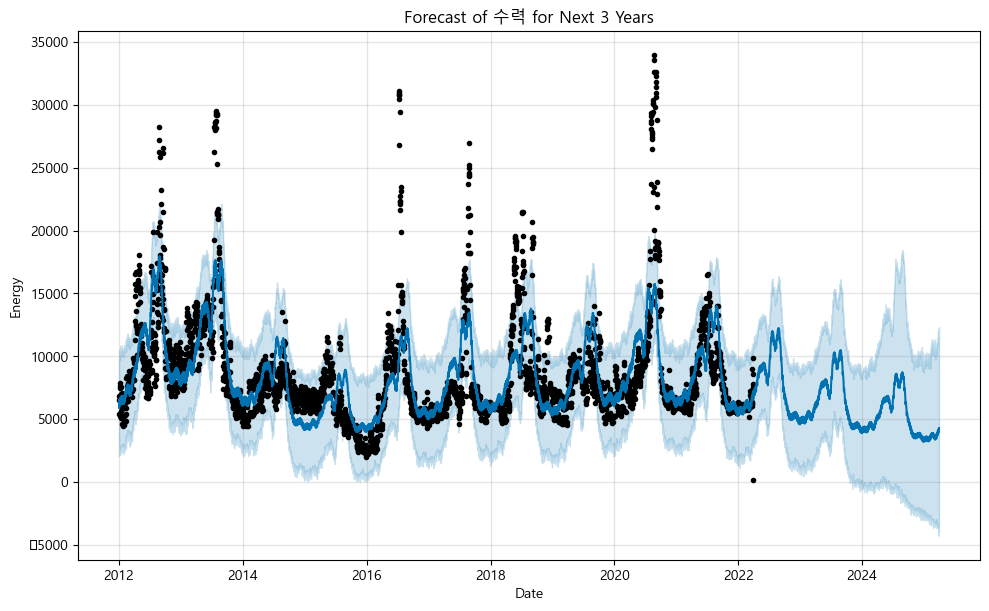

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:54 - cmdstanpy - INFO - Chain [1] start processing
19:25:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

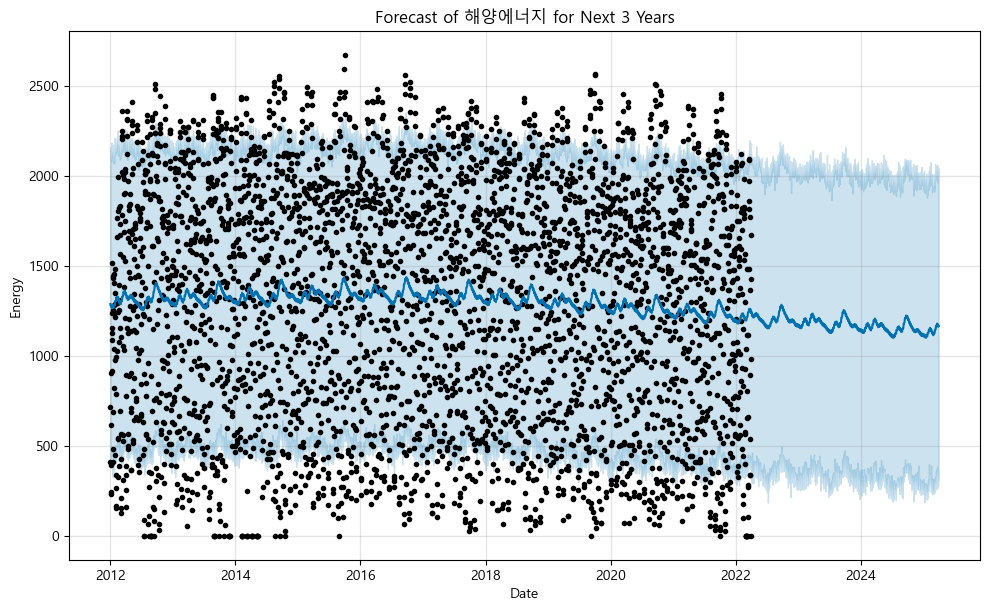

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:56 - cmdstanpy - INFO - Chain [1] start processing
19:25:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

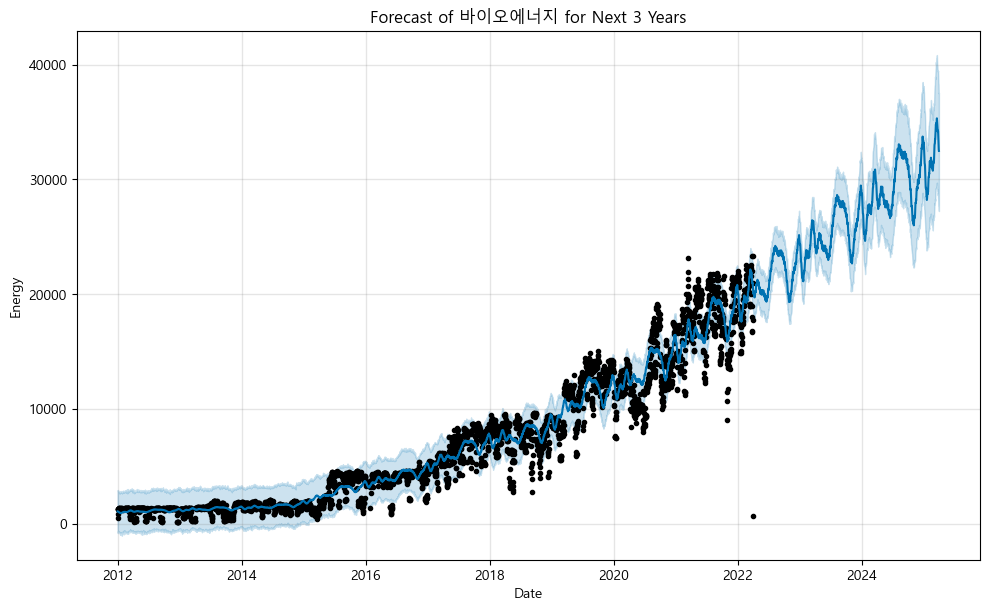

C:\Users\82106\AppData\Local\Temp\ipykernel_34696\2802874191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy['y'].fillna(0, inplace=True)
19:25:59 - cmdstanpy - INFO - Chain [1] start processing
19:26:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

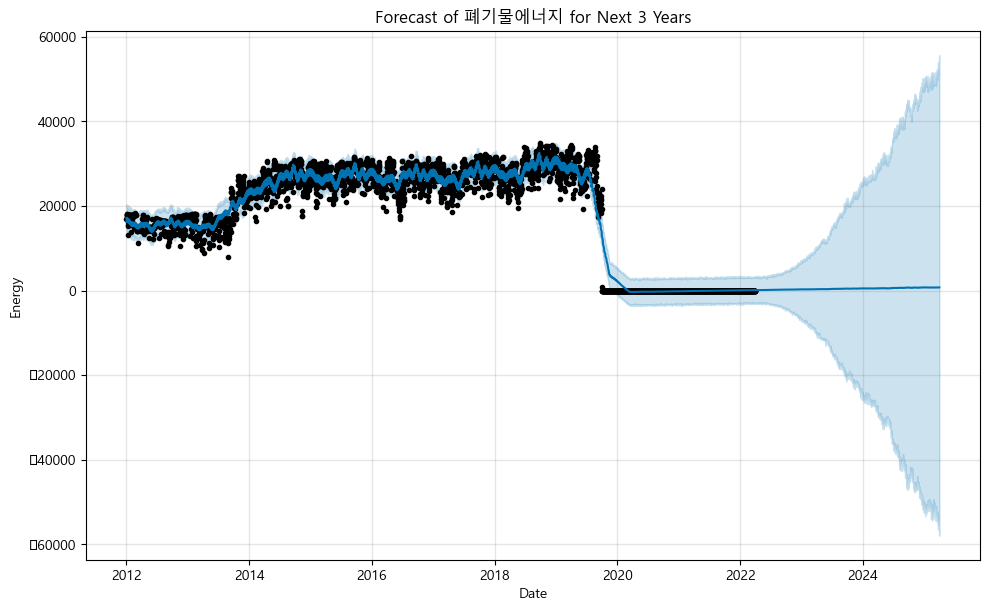

: 

In [20]:
# 모든 에너지원에 대해 예측 수행
for energy in energy_columns:
    # 현재 에너지원 데이터 준비
    df_energy = df_daily[['datetime', energy]].rename(columns={'datetime': 'ds', energy: 'y'})
    
    # 결측치 처리 (필요 시)
    df_energy['y'].fillna(0, inplace=True)
    
    # 모델 초기화 및 학습
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')
    model.fit(df_energy)
    
    # 미래 데이터프레임 생성 및 예측
    future = model.make_future_dataframe(periods=365*3)
    forecast = model.predict(future)
    
    # 예측 결과 저장
    forecast_result = forecast[['ds', 'yhat']].rename(columns={'yhat': energy})
    if results.empty:
        results = forecast_result
    else:
        results = results.merge(forecast_result, on='ds')
    
    # 예측 결과 시각화
    fig = model.plot(forecast)
    plt.title(f'Forecast of {energy} for Next 3 Years')
    plt.xlabel('Date')
    plt.ylabel('Energy')
    plt.show()
